Copyright 2020 DeepMind Technologies Limited.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Open X-Embodiment Datasets

![](https://robotics-transformer-x.github.io/img/overview.png)

This colab helps you **visualize** the datasets in the Open X-Embodiment Dataset, explains how to **download** them and how to **train** with them.

Table of Content:

>[Open X-Embodiment Datasets](#scrollTo=EnWCKLGGaf-d)

>[Visualize Datasets](#scrollTo=29c7oLlJbWwF)

>[Download Datasets](#scrollTo=-WHN-2OrKqGo)

>[Data Loader Example](#scrollTo=IyccDsRqwtMz)

>[Interleave Multiple Datasets](#scrollTo=ekmsGRAnw3Bp)

>[Example Dataloader to produce trajectories](#scrollTo=aew258oUbamg)

>>[Demonstration of transformation from an episode to a trajectory](#scrollTo=BK4RRYkbLN5B)

>>[Combination of multiple datasets](#scrollTo=Oy89HzymQyAq)

>[Available datasets:](#scrollTo=N2Efw2aHVfSX)



# Visualize Datasets

In [2]:
import numpy as np
import tensorflow_datasets as tfds
from PIL import Image
from IPython import display

DATASETS = [
    'columbia_cairlab_pusht_real',
    'asu_table_top_converted_externally_to_rlds',
]
columbia = DATASETS[0]
asu = DATASETS[1]

def dataset2path(dataset_name):
  if dataset_name == 'robo_net':
    version = '1.0.0'
  elif dataset_name == 'language_table':
    version = '0.0.1'
  else:
    version = '0.1.0'
  return f'gs://gresearch/robotics/{dataset_name}/{version}'


def as_gif(images, path='temp.gif'):
  # Render the images as the gif:
  images[0].save(path, save_all=True, append_images=images[1:], duration=1000, loop=0)
  gif_bytes = open(path,'rb').read()
  return gif_bytes

In [7]:
# choose the dataset path in the dropdown on the right and rerun this cell
# to see multiple samples

dataset = columbia
display_key = 'image'

b = tfds.builder_from_directory(builder_dir=dataset2path(dataset))
# if display_key not in b.info.features['steps']['observation']:
#   raise ValueError(
#       f"The key {display_key} was not found in this dataset.\n"
#       + "Please choose a different image key to display for this dataset.\n"
#       + "Here is the observation spec:\n"
#       + str(b.info.features['steps']['observation']))

ds = b.as_dataset(split='train[:10]').shuffle(10)   # take only first 10 episodes
episode = next(iter(ds))
images = [step['observation'][display_key] for step in episode['steps']]
images = [Image.fromarray(image.numpy()) for image in images]
display.Image(as_gif(images))

UnimplementedError: File system scheme 'gs' not implemented (file: 'gs://gresearch/robotics/columbia_cairlab_pusht_real/0.1.0/dataset_info.json')

In [6]:
# other elements of the episode step --> this may vary for each dataset
for elem in next(iter(episode['steps'])).items():
  print(elem)

NameError: name 'episode' is not defined

# Download Datasets

All datasets can be downloaded simply via `tfds.load(<dataset_name>)`.
Below we provide a script that downloads all datasets into `~/tensorflow_datasets` on your local machine. Simply copy the code and run it on your local machine to download the full dataset (XXX TB).

If you want to filter the dataset before download, please refer to
[this Google Sheet](https://docs.google.com/spreadsheets/d/1rPBD77tk60AEIGZrGSODwyyzs5FgCU9Uz3h-3_t2A9g/edit?usp=sharing). It allows you
to filter the data by attributes like robot model, number of cameras, type of tasks etc. You can then download only the filtered datasets by pasting the
dataset list from the spreadsheet into the code below.

The download code will automatically skip any datasets you have previously downloaded.

In [ ]:
!pip install tfds-nightly   # to get most up-to-date registered datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 40.7 MB/s eta 0:00:00


In [13]:
import tensorflow as tf
import tensorflow_io as tfio

tf.io.gfile.exists('s3://aiq-poodle-dev/test/test.txt')

UnimplementedError: File system scheme 's3' not implemented (file: 's3://aiq-poodle-dev/test/test.txt')

In [10]:
tfds.builder_from_directory('gs://gresearch/robotics/columbia_cairlab_pusht_real/0.1.0/dataset_info.json')

UnimplementedError: File system scheme 'gs' not implemented (file: 'gs://gresearch/robotics/columbia_cairlab_pusht_real/0.1.0/dataset_info.json/dataset_info.json')

In [9]:
import tensorflow_datasets as tfds
import tqdm

# optionally replace the DATASET_NAMES below with the list of filtered datasets from the google sheet
# DATASET_NAMES = ['fractal20220817_data', 'kuka', 'bridge', 'taco_play', 'jaco_play', 'berkeley_cable_routing', 'roboturk', 'nyu_door_opening_surprising_effectiveness', 'viola', 'berkeley_autolab_ur5', 'toto', 'language_table', 'columbia_cairlab_pusht_real', 'stanford_kuka_multimodal_dataset_converted_externally_to_rlds', 'nyu_rot_dataset_converted_externally_to_rlds', 'stanford_hydra_dataset_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'nyu_franka_play_dataset_converted_externally_to_rlds', 'maniskill_dataset_converted_externally_to_rlds', 'furniture_bench_dataset_converted_externally_to_rlds', 'cmu_franka_exploration_dataset_converted_externally_to_rlds', 'ucsd_kitchen_dataset_converted_externally_to_rlds', 'ucsd_pick_and_place_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bc_z', 'usc_cloth_sim_converted_externally_to_rlds', 'utokyo_pr2_opening_fridge_converted_externally_to_rlds', 'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds', 'utokyo_saytap_converted_externally_to_rlds', 'utokyo_xarm_pick_and_place_converted_externally_to_rlds', 'utokyo_xarm_bimanual_converted_externally_to_rlds', 'robo_net', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'kaist_nonprehensile_converted_externally_to_rlds', 'stanford_mask_vit_converted_externally_to_rlds', 'tokyo_u_lsmo_converted_externally_to_rlds', 'dlr_sara_pour_converted_externally_to_rlds', 'dlr_sara_grid_clamp_converted_externally_to_rlds', 'dlr_edan_shared_control_converted_externally_to_rlds', 'asu_table_top_converted_externally_to_rlds', 'stanford_robocook_converted_externally_to_rlds', 'eth_agent_affordances', 'imperialcollege_sawyer_wrist_cam', 'iamlab_cmu_pickup_insert_converted_externally_to_rlds', 'uiuc_d3field', 'utaustin_mutex', 'berkeley_fanuc_manipulation', 'cmu_food_manipulation', 'cmu_play_fusion', 'cmu_stretch', 'berkeley_gnm_recon', 'berkeley_gnm_cory_hall', 'berkeley_gnm_sac_son']
DATASET_NAMES = ['columbia_cairlab_pusht_real', 'asu_table_top_converted_externally_to_rlds']
DOWNLOAD_DIR = 'C:/Users/willi/OneDrive/Desktop/open-x-datasets/'

print(f"Downloading {len(DATASET_NAMES)} datasets to {DOWNLOAD_DIR}.")
for dataset_name in tqdm.tqdm(DATASET_NAMES):
  _ = tfds.load(dataset_name, data_dir=DOWNLOAD_DIR)


  0%|          | 0/2 [00:00<?, ?it/s]


RuntimeError: UnimplementedError: Failed to construct dataset "columbia_cairlab_pusht_real", builder_kwargs "{'data_dir': 'C:/Users/willi/OneDrive/Desktop/open-x-datasets/'}": File system scheme 'gs' not implemented (file: 'gs://gresearch/robotics/columbia_cairlab_pusht_real/0.1.0/dataset_info.json')

# Data Loader Example

Below, we demonstrate a simple example of how to load the dataset into training batches, where each sample in the batch only contains one step.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# load raw dataset --> replace this with tfds.load(<dataset_name>) on your
# local machine!
dataset = 'kuka'
b = tfds.builder_from_directory(builder_dir=dataset2path(dataset))
ds = b.as_dataset(split='train[:10]')

def episode2steps(episode):
  return episode['steps']

def step_map_fn(step):
  return {
      'observation': {
          'image': tf.image.resize(step['observation']['image'], (128, 128)),
      },
      'action': tf.concat([
          step['action']['world_vector'],
          step['action']['rotation_delta'],
          step['action']['gripper_closedness_action'],
      ], axis=-1)
  }

# convert RLDS episode dataset to individual steps & reformat
ds = ds.map(
    episode2steps, num_parallel_calls=tf.data.AUTOTUNE).flat_map(lambda x: x)
ds = ds.map(step_map_fn, num_parallel_calls=tf.data.AUTOTUNE)

# shuffle, repeat, pre-fetch, batch
ds = ds.cache()         # optionally keep full dataset in memory
ds = ds.shuffle(100)    # set shuffle buffer size
ds = ds.repeat()        # ensure that data never runs out

In [ ]:
import tqdm

for i, batch in tqdm.tqdm(
    enumerate(ds.prefetch(3).batch(4).as_numpy_iterator())):
  # here you would add your Jax / PyTorch training code
  if i == 10000: break

10000it [00:08, 1229.06it/s]


# Interleave Multiple Datasets


In [ ]:
# Load second dataset --> replace this with tfds.load(<dataset_name>) on your
# local machine!
dataset = 'utaustin_mutex'
b = tfds.builder_from_directory(builder_dir=dataset2path(dataset))
ds2 = b.as_dataset(split='train[:10]')

def step_map_fn_mutex(step):
  # reformat to align specs of both datasets
  return {
      'observation': {
          'image': tf.image.resize(step['observation']['image'], (128, 128)),
      },
      'action': step['action'],
  }

ds2 = ds2.map(
    episode2steps, num_parallel_calls=tf.data.AUTOTUNE).flat_map(lambda x: x)
ds2 = ds2.map(step_map_fn_mutex, num_parallel_calls=tf.data.AUTOTUNE)

# shuffle, repeat, pre-fetch, batch
ds2 = ds2.cache()         # optionally keep full dataset in memory
ds2 = ds2.shuffle(100)    # set shuffle buffer size
ds2 = ds2.repeat()        # ensure that data never runs out

In [ ]:
# interleave datasets w/ equal sampling weight
ds_combined = tf.data.Dataset.sample_from_datasets([ds, ds2], [0.5, 0.5])

In [ ]:
import tqdm

for i, batch in tqdm.tqdm(
    enumerate(ds_combined.prefetch(3).batch(4).as_numpy_iterator())):
  # here you would add your Jax / PyTorch training code
  if i == 10000: break

10000it [00:12, 772.31it/s]


# Example Dataloader to produce trajectories

When training transformers, we usually use trajectories of fix-length as input into the transformers. This is to enable the transformer to condition on a fixed window of history when predicting actions.

Below we demonstrate how one can load the TFDS datasets, transform the episodes
into fixed-length "trajectories" and mix multiple datasets by aligning their specs.

In [ ]:
!pip install rlds[tensorflow]

In [ ]:
from typing import Any, Dict, Union, NamedTuple

import numpy as np
import tensorflow_datasets as tfds
import rlds
import reverb
from rlds import transformations
import tensorflow_datasets as tfds
import tree

import abc
import dataclasses
from typing import Dict, Optional

from rlds import rlds_types
import tensorflow as tf
from PIL import Image
from IPython import display

In [ ]:
# @title Transformation definitions

def _features_to_tensor_spec(
    feature: tfds.features.FeatureConnector
) -> tf.TensorSpec:
  """Converts a tfds Feature into a TensorSpec."""

  def _get_feature_spec(nested_feature: tfds.features.FeatureConnector):
    if isinstance(nested_feature, tf.DType):
      return tf.TensorSpec(shape=(), dtype=nested_feature)
    else:
      return nested_feature.get_tensor_spec()

  # FeaturesDict can sometimes be a plain dictionary, so we use tf.nest to
  # make sure we deal with the nested structure.
  return tf.nest.map_structure(_get_feature_spec, feature)


def _encoded_feature(feature: Optional[tfds.features.FeatureConnector],
                     image_encoding: Optional[str],
                     tensor_encoding: Optional[tfds.features.Encoding]):
  """Adds encoding to Images and/or Tensors."""
  def _apply_encoding(feature: tfds.features.FeatureConnector,
                      image_encoding: Optional[str],
                      tensor_encoding: Optional[tfds.features.Encoding]):
    if image_encoding and isinstance(feature, tfds.features.Image):
      return tfds.features.Image(
          shape=feature.shape,
          dtype=feature.dtype,
          use_colormap=feature.use_colormap,
          encoding_format=image_encoding)
    if tensor_encoding and isinstance(
        feature, tfds.features.Tensor) and feature.dtype != tf.string:
      return tfds.features.Tensor(
          shape=feature.shape, dtype=feature.dtype, encoding=tensor_encoding)
    return feature

  if not feature:
    return None
  return tf.nest.map_structure(
      lambda x: _apply_encoding(x, image_encoding, tensor_encoding), feature)


@dataclasses.dataclass
class RLDSSpec(metaclass=abc.ABCMeta):
  """Specification of an RLDS Dataset.

  It is used to hold a spec that can be converted into a TFDS DatasetInfo or
  a `tf.data.Dataset` spec.
  """
  observation_info: Optional[tfds.features.FeatureConnector] = None
  action_info: Optional[tfds.features.FeatureConnector] = None
  reward_info: Optional[tfds.features.FeatureConnector] = None
  discount_info: Optional[tfds.features.FeatureConnector] = None
  step_metadata_info: Optional[tfds.features.FeaturesDict] = None
  episode_metadata_info: Optional[tfds.features.FeaturesDict] = None

  def step_tensor_spec(self) -> Dict[str, tf.TensorSpec]:
    """Obtains the TensorSpec of an RLDS step."""
    step = {}
    if self.observation_info:
      step[rlds_types.OBSERVATION] = _features_to_tensor_spec(
          self.observation_info)
    if self.action_info:
      step[rlds_types.ACTION] = _features_to_tensor_spec(
          self.action_info)
    if self.discount_info:
      step[rlds_types.DISCOUNT] = _features_to_tensor_spec(
          self.discount_info)
    if self.reward_info:
      step[rlds_types.REWARD] = _features_to_tensor_spec(
          self.reward_info)
    if self.step_metadata_info:
      for k, v in self.step_metadata_info.items():
        step[k] = _features_to_tensor_spec(v)

    step[rlds_types.IS_FIRST] = tf.TensorSpec(shape=(), dtype=bool)
    step[rlds_types.IS_LAST] = tf.TensorSpec(shape=(), dtype=bool)
    step[rlds_types.IS_TERMINAL] = tf.TensorSpec(shape=(), dtype=bool)
    return step

  def episode_tensor_spec(self) -> Dict[str, tf.TensorSpec]:
    """Obtains the TensorSpec of an RLDS step."""
    episode = {}
    episode[rlds_types.STEPS] = tf.data.DatasetSpec(
        element_spec=self.step_tensor_spec())
    if self.episode_metadata_info:
      for k, v in self.episode_metadata_info.items():
        episode[k] = _features_to_tensor_spec(v)
    return episode

  def to_dataset_config(
      self,
      name: str,
      image_encoding: Optional[str] = None,
      tensor_encoding: Optional[tfds.features.Encoding] = None,
      citation: Optional[str] = None,
      homepage: Optional[str] = None,
      description: Optional[str] = None,
      overall_description: Optional[str] = None,
  ) -> tfds.rlds.rlds_base.DatasetConfig:
    """Obtains the DatasetConfig for TFDS from the Spec."""
    return tfds.rlds.rlds_base.DatasetConfig(
        name=name,
        description=description,
        overall_description=overall_description,
        homepage=homepage,
        citation=citation,
        observation_info=_encoded_feature(self.observation_info, image_encoding,
                                          tensor_encoding),
        action_info=_encoded_feature(self.action_info, image_encoding,
                                     tensor_encoding),
        reward_info=_encoded_feature(self.reward_info, image_encoding,
                                     tensor_encoding),
        discount_info=_encoded_feature(self.discount_info, image_encoding,
                                       tensor_encoding),
        step_metadata_info=_encoded_feature(self.step_metadata_info,
                                            image_encoding, tensor_encoding),
        episode_metadata_info=_encoded_feature(self.episode_metadata_info,
                                               image_encoding, tensor_encoding))

  def to_features_dict(self):
    """Returns a TFDS FeaturesDict representing the dataset config."""
    step_config = {
        rlds_types.IS_FIRST: tf.bool,
        rlds_types.IS_LAST: tf.bool,
        rlds_types.IS_TERMINAL: tf.bool,
    }

    if self.observation_info:
      step_config[rlds_types.OBSERVATION] = self.observation_info
    if self.action_info:
      step_config[rlds_types.ACTION] = self.action_info
    if self.discount_info:
      step_config[rlds_types.DISCOUNT] = self.discount_info
    if self.reward_info:
      step_config[rlds_types.REWARD] = self.reward_info

    if self.step_metadata_info:
      for k, v in self.step_metadata_info.items():
        step_config[k] = v

    if self.episode_metadata_info:
      return tfds.features.FeaturesDict({
          rlds_types.STEPS: tfds.features.Dataset(step_config),
          **self.episode_metadata_info,
      })
    else:
      return tfds.features.FeaturesDict({
          rlds_types.STEPS: tfds.features.Dataset(step_config),
      })

RLDS_SPEC = RLDSSpec
TENSOR_SPEC = Union[tf.TensorSpec, dict[str, tf.TensorSpec]]


@dataclasses.dataclass
class TrajectoryTransform(metaclass=abc.ABCMeta):
  """Specification the TrajectoryTransform applied to a dataset of episodes.

  A TrajectoryTransform is a set of rules transforming a dataset
  of RLDS episodes to a dataset of trajectories.
  This involves three distinct stages:
  - An optional `episode_to_steps_map_fn(episode)` is called at the episode
    level, and can be used to select or modify steps.
    - Augmentation: an `episode_key` could be propagated to `steps` for
      debugging.
    - Selection: Particular steps can be selected.
    - Stripping: Features can be removed from steps. Prefer using `step_map_fn`.
  - An optional `step_map_fn` is called at the flattened steps dataset for each
    step, and can be used to featurize a step, e.g. add/remove features, or
    augument images
  - A `pattern` leverages DM patterns to set a rule of slicing an episode to a
    dataset of overlapping trajectories.

  Importantly, each TrajectoryTransform must define a `expected_tensor_spec`
  which specifies a nested TensorSpec of the resulting dataset. This is what
  this TrajectoryTransform will produce, and can be used as an interface with
  a neural network.
  """
  episode_dataset_spec: RLDS_SPEC
  episode_to_steps_fn_dataset_spec: RLDS_SPEC
  steps_dataset_spec: Any
  pattern: reverb.structured_writer.Pattern
  episode_to_steps_map_fn: Any
  expected_tensor_spec: TENSOR_SPEC
  step_map_fn: Optional[Any] = None

  def get_for_cached_trajectory_transform(self):
    """Creates a copy of this traj transform to use with caching.

    The returned TrajectoryTransfrom copy will be initialized with the default
    version of the `episode_to_steps_map_fn`, because the effect of that
    function has already been materialized in the cached copy of the dataset.
    Returns:
      trajectory_transform: A copy of the TrajectoryTransform with overridden
        `episode_to_steps_map_fn`.
    """
    traj_copy = dataclasses.replace(self)
    traj_copy.episode_dataset_spec = traj_copy.episode_to_steps_fn_dataset_spec
    traj_copy.episode_to_steps_map_fn = lambda e: e[rlds_types.STEPS]
    return traj_copy

  def transform_episodic_rlds_dataset(self, episodes_dataset: tf.data.Dataset):
    """Applies this TrajectoryTransform to the dataset of episodes."""

    # Convert the dataset of episodes to the dataset of steps.
    steps_dataset = episodes_dataset.map(
        self.episode_to_steps_map_fn, num_parallel_calls=tf.data.AUTOTUNE
    ).flat_map(lambda x: x)

    return self._create_pattern_dataset(steps_dataset)

  def transform_steps_rlds_dataset(
      self, steps_dataset: tf.data.Dataset
  ) -> tf.data.Dataset:
    """Applies this TrajectoryTransform to the dataset of episode steps."""

    return self._create_pattern_dataset(steps_dataset)

  def create_test_dataset(
      self,
  ) -> tf.data.Dataset:
    """Creates a test dataset of trajectories.

    It is guaranteed that the structure of this dataset will be the same as
    when flowing real data. Hence this is a useful construct for tests or
    initialization of JAX models.
    Returns:
      dataset: A test dataset made of zeros structurally identical to the
        target dataset of trajectories.
    """
    zeros = transformations.zeros_from_spec(self.expected_tensor_spec)

    return tf.data.Dataset.from_tensors(zeros)

  def _create_pattern_dataset(
      self, steps_dataset: tf.data.Dataset) -> tf.data.Dataset:
    """Create PatternDataset from the `steps_dataset`."""
    config = create_structured_writer_config('temp', self.pattern)

    # Further transform each step if the `step_map_fn` is provided.
    if self.step_map_fn:
      steps_dataset = steps_dataset.map(self.step_map_fn)
    pattern_dataset = reverb.PatternDataset(
        input_dataset=steps_dataset,
        configs=[config],
        respect_episode_boundaries=True,
        is_end_of_episode=lambda x: x[rlds_types.IS_LAST])
    return pattern_dataset


class TrajectoryTransformBuilder(object):
  """Facilitates creation of the `TrajectoryTransform`."""

  def __init__(self,
               dataset_spec: RLDS_SPEC,
               episode_to_steps_map_fn=lambda e: e[rlds_types.STEPS],
               step_map_fn=None,
               pattern_fn=None,
               expected_tensor_spec=None):
    self._rds_dataset_spec = dataset_spec
    self._steps_spec = None
    self._episode_to_steps_map_fn = episode_to_steps_map_fn
    self._step_map_fn = step_map_fn
    self._pattern_fn = pattern_fn
    self._expected_tensor_spec = expected_tensor_spec

  def build(self,
            validate_expected_tensor_spec: bool = True) -> TrajectoryTransform:
    """Creates `TrajectoryTransform` from a `TrajectoryTransformBuilder`."""

    if validate_expected_tensor_spec and self._expected_tensor_spec is None:
      raise ValueError('`expected_tensor_spec` must be set.')

    episode_ds = zero_episode_dataset_from_spec(self._rds_dataset_spec)

    steps_ds = episode_ds.flat_map(self._episode_to_steps_map_fn)

    episode_to_steps_fn_dataset_spec = self._rds_dataset_spec

    if self._step_map_fn is not None:
      steps_ds = steps_ds.map(self._step_map_fn)

    zeros_spec = transformations.zeros_from_spec(steps_ds.element_spec)  # pytype: disable=wrong-arg-types

    ref_step = reverb.structured_writer.create_reference_step(zeros_spec)

    pattern = self._pattern_fn(ref_step)

    steps_ds_spec = steps_ds.element_spec

    target_tensor_structure = create_reverb_table_signature(
        'temp_table', steps_ds_spec, pattern)

    if (validate_expected_tensor_spec and
        self._expected_tensor_spec != target_tensor_structure):
      raise RuntimeError(
          'The tensor spec of the TrajectoryTransform doesn\'t '
          'match the expected spec.\n'
          'Expected:\n%s\nActual:\n%s\n' %
          (str(self._expected_tensor_spec).replace('TensorSpec',
                                                   'tf.TensorSpec'),
           str(target_tensor_structure).replace('TensorSpec', 'tf.TensorSpec')))

    return TrajectoryTransform(
        episode_dataset_spec=self._rds_dataset_spec,
        episode_to_steps_fn_dataset_spec=episode_to_steps_fn_dataset_spec,
        steps_dataset_spec=steps_ds_spec,
        pattern=pattern,
        episode_to_steps_map_fn=self._episode_to_steps_map_fn,
        step_map_fn=self._step_map_fn,
        expected_tensor_spec=target_tensor_structure)

def zero_episode_dataset_from_spec(rlds_spec: RLDS_SPEC):
  """Creates a zero valued dataset of episodes for the given RLDS Spec."""

  def add_steps(episode, step_spec):
    episode[rlds_types.STEPS] = transformations.zero_dataset_like(
        tf.data.DatasetSpec(step_spec))
    if 'fake' in episode:
      del episode['fake']
    return episode

  episode_without_steps_spec = {
      k: v
      for k, v in rlds_spec.episode_tensor_spec().items()
      if k != rlds_types.STEPS
  }

  if episode_without_steps_spec:
    episodes_dataset = transformations.zero_dataset_like(
        tf.data.DatasetSpec(episode_without_steps_spec))
  else:
    episodes_dataset = tf.data.Dataset.from_tensors({'fake': ''})

  episodes_dataset_with_steps = episodes_dataset.map(
      lambda episode: add_steps(episode, rlds_spec.step_tensor_spec()))
  return episodes_dataset_with_steps


def create_reverb_table_signature(table_name: str, steps_dataset_spec,
                                  pattern: reverb.structured_writer.Pattern) -> reverb.reverb_types.SpecNest:
  config = create_structured_writer_config(table_name, pattern)
  reverb_table_spec = reverb.structured_writer.infer_signature(
      [config], steps_dataset_spec)
  return reverb_table_spec


def create_structured_writer_config(table_name: str,
                                    pattern: reverb.structured_writer.Pattern) -> Any:
  config = reverb.structured_writer.create_config(
      pattern=pattern, table=table_name, conditions=[])
  return config

def n_step_pattern_builder(n: int) -> Any:
  """Creates trajectory of length `n` from all fields of a `ref_step`."""

  def transform_fn(ref_step):
    traj = {}
    for key in ref_step:
      if isinstance(ref_step[key], dict):
        transformed_entry = tree.map_structure(lambda ref_node: ref_node[-n:],
                                               ref_step[key])
        traj[key] = transformed_entry
      else:
        traj[key] = ref_step[key][-n:]

    return traj

  return transform_fn



## Demonstration of transformation from an episode to a trajectory

A real ML pipeline would rarely learn from a whole episode. Instead the input to a model is a _trajectory_. A `Trajectory` is a particular way to slice a sequence of episode steps. `SARSA` trajectory is one well known example, but a trajectory of an arbitrary length `n` is also an option. Often, a set of _overlapping_ trajectories is produced from an episode. For example, given the following episode steps:

`episode=[s_0, s_1, s_2, s_3, s_4, s_T]`

and a target Trajectory of length `3`, the following trajectories are produced:

`t_1=[s_0, s_1, s_2]`

`t_2=[s_1, s_2, s_3]`

`t_3=[s_2, s_3, s_4]`

`t_4=[s_3, s_4, s_T]`


To perform such a slicing, the dataset of episode is first "flattened" to the dataset of steps. The `is_last` attribute of an RLDS step allows proper slicing, not crossing the episode boundary. The `TrajectoryTransformBuilder` demonstrates this:

In [ ]:
import tensorflow_datasets as tfds
mt_opt_builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/mt_opt_rlds/1.0.0/')

mt_opt_episodic_dataset = mt_opt_builder.as_dataset(split='train[:10]')


In [ ]:
# The RLDSSpec for the `mt_opt` dataset.
mt_opt_rlds_spec = RLDSSpec(
    observation_info=b.info.features['steps']['observation'],
    action_info=b.info.features['steps']['action'],
)

# The following will create a trajectories of length 3.
trajectory_length = 3
trajectory_transform = TrajectoryTransformBuilder(mt_opt_rlds_spec, pattern_fn=n_step_pattern_builder(trajectory_length)).build(validate_expected_tensor_spec=False)

In [ ]:
trajectory_dataset = trajectory_transform.transform_episodic_rlds_dataset(mt_opt_episodic_dataset)

trajectory_iter = iter(trajectory_dataset)

In [ ]:
trajectory = next(trajectory_iter)

In [ ]:
trajectory

{'is_first': <tf.Tensor: shape=(3,), dtype=bool, numpy=array([ True, False, False])>,
 'observation': {'image': <tf.Tensor: shape=(3, 512, 640, 3), dtype=uint8, numpy=
  array([[[[52, 49, 56],
           [51, 50, 56],
           [50, 49, 55],
           ...,
           [ 0,  2,  2],
           [ 0,  1,  4],
           [ 0,  1,  4]],
  
          [[51, 48, 55],
           [49, 48, 54],
           [47, 48, 53],
           ...,
           [ 0,  1,  0],
           [ 0,  1,  2],
           [ 0,  1,  2]],
  
          [[52, 51, 57],
           [50, 49, 55],
           [48, 49, 53],
           ...,
           [ 0,  0,  0],
           [ 0,  0,  0],
           [ 0,  0,  0]],
  
          ...,
  
          [[32, 33, 37],
           [31, 32, 36],
           [32, 33, 37],
           ...,
           [ 0,  1,  0],
           [ 0,  0,  0],
           [ 1,  0,  0]],
  
          [[31, 32, 36],
           [31, 32, 36],
           [32, 33, 37],
           ...,
           [ 0,  1,  0],
           [ 0,  0

In [ ]:
# Note that the leading dimension (3) corresponds to the trajectory_length
trajectory['observation']['image'].shape

TensorShape([3, 512, 640, 3])

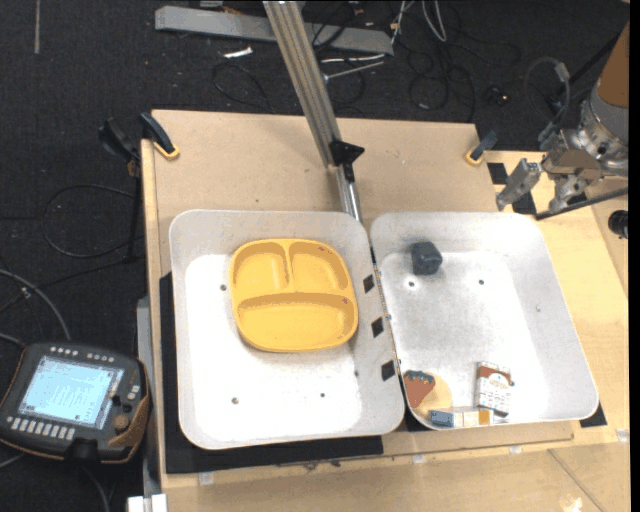

In [ ]:
episode = episodes[0]

# Iterate over steps of the episode. Collect images.
images = [trajectory['observation']['image'][id] for id in range(trajectory['observation']['image'].shape[0])]
images = [Image.fromarray(image.numpy()) for image in images]

display.Image(as_gif(images))

## Combination of multiple datasets

In [ ]:
import tensorflow_datasets as tfds
robo_net_builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/robo_net/1.0.0/')

robo_net_builder_episodic_dataset = robo_net_builder.as_dataset(split='train[:10]')
episodes = list(iter(robo_net_builder_episodic_dataset))

In [ ]:
# The following will create a trajectories of length 3.
trajectory_length = 3

robo_net_rlds_spec = RLDSSpec(
    observation_info=robo_net_builder.info.features['steps']['observation'],
    action_info=robo_net_builder.info.features['steps']['action'],
)

def robo_net_step_map_fn(step):
  transformed_step = {}
  transformed_step['observation'] = step['observation']['image']
  transformed_step['is_first'] = step['is_first']
  transformed_step['is_last'] = step['is_last']
  transformed_step['is_terminal'] = step['is_terminal']
  return transformed_step

robo_net_trajectory_transform = TrajectoryTransformBuilder(robo_net_rlds_spec,
                                                                          step_map_fn=robo_net_step_map_fn,
                                                                          pattern_fn=n_step_pattern_builder(trajectory_length)).build(validate_expected_tensor_spec=False)


def mt_opt_step_map_fn(step):
  transformed_step = {}
  transformed_step['observation'] = tf.cast(tf.image.resize(step['observation']['image'], [240, 320]), tf.uint8)  # Resize to be compatible with robo_net trajectory
  transformed_step['is_first'] = step['is_first']
  transformed_step['is_last'] = step['is_last']
  transformed_step['is_terminal'] = step['is_terminal']
  return transformed_step

mt_opt_trajectory_transform = TrajectoryTransformBuilder(mt_opt_rlds_spec,
                                                         step_map_fn=mt_opt_step_map_fn,
                                                         pattern_fn=n_step_pattern_builder(trajectory_length)).build(validate_expected_tensor_spec=False)

In [ ]:
# Validate that the specs are equal
assert robo_net_trajectory_transform.expected_tensor_spec == mt_opt_trajectory_transform.expected_tensor_spec

In [ ]:
# Create trajectory datasets for the two normalized representations:
robo_net_trajectory_dataset = robo_net_trajectory_transform.transform_episodic_rlds_dataset(robo_net_builder_episodic_dataset)
mt_opt_trajectory_dataset = mt_opt_trajectory_transform.transform_episodic_rlds_dataset(mt_opt_episodic_dataset)


In [ ]:
combined_dataset = tf.data.Dataset.sample_from_datasets([robo_net_trajectory_dataset, mt_opt_trajectory_dataset])
combined_dataset = combined_dataset.batch(2)
combined_dataset_it = iter(combined_dataset)

In [ ]:
example = next(combined_dataset_it)

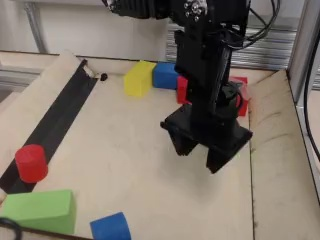

In [ ]:
# First element of the batch returns a robot_net trajectory
Image.fromarray(example['observation'].numpy()[0][0])

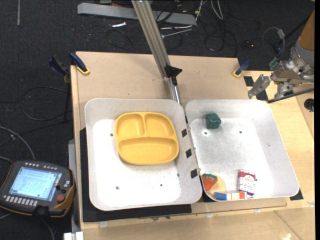

In [ ]:
# Second element of the batch returns a mt_opt trajectory
Image.fromarray(example['observation'].numpy()[1][0])

# Available datasets and their sizes:

In [ ]:
# Iterate over and make sure that a dataset can be created
for name in DATASETS:
  uri = dataset2path(name)
  b = tfds.builder_from_directory(builder_dir=uri)
  split = list(b.info.splits.keys())[0]
  b.as_dataset(split=split)
  print('Dataset %s has size %s'%(uri, b.info.dataset_size))


Dataset gs://gresearch/robotics/fractal20220817_data/0.1.0 has size 111.07 GiB
Dataset gs://gresearch/robotics/kuka/0.1.0 has size 778.02 GiB
Dataset gs://gresearch/robotics/bridge/0.1.0 has size 387.49 GiB
Dataset gs://gresearch/robotics/taco_play/0.1.0 has size 47.77 GiB
Dataset gs://gresearch/robotics/jaco_play/0.1.0 has size 9.24 GiB
Dataset gs://gresearch/robotics/berkeley_cable_routing/0.1.0 has size 4.67 GiB
Dataset gs://gresearch/robotics/roboturk/0.1.0 has size 45.39 GiB
Dataset gs://gresearch/robotics/nyu_door_opening_surprising_effectiveness/0.1.0 has size 7.12 GiB
Dataset gs://gresearch/robotics/viola/0.1.0 has size 10.40 GiB
Dataset gs://gresearch/robotics/berkeley_autolab_ur5/0.1.0 has size 76.39 GiB
Dataset gs://gresearch/robotics/toto/0.1.0 has size 127.66 GiB
Dataset gs://gresearch/robotics/language_table/0.0.1 has size 399.23 GiB
Dataset gs://gresearch/robotics/columbia_cairlab_pusht_real/0.1.0 has size 2.80 GiB
Dataset gs://gresearch/robotics/stanford_kuka_multimodal

In [ ]:
# Might require updating tensorflow datasets:
!pip install --upgrade --force-reinstall git+https://github.com/tensorflow/datasets.git

  Cloning https://github.com/tensorflow/datasets.git to /tmp/pip-req-build-ahr1bxz5
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/datasets.git /tmp/pip-req-build-ahr1bxz5
  Resolved https://github.com/tensorflow/datasets.git to commit 24855b21581fe318f4b7160001b80696e5f79b5c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 590.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 72.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
for name in DATASET_NAMES:
  print(name)
  b = tfds.builder(name)

bridge
taco_play
jaco_play
berkeley_cable_routing
roboturk
nyu_door_opening_surprising_effectiveness
viola
berkeley_autolab_ur5
toto
utokyo_xarm_bimanual_converted_externally_to_rlds
berkeley_mvp_converted_externally_to_rlds
dlr_sara_grid_clamp_converted_externally_to_rlds
nyu_rot_dataset_converted_externally_to_rlds
berkeley_gnm_sac_son
maniskill_dataset_converted_externally_to_rlds
utaustin_mutex
bc_z
austin_buds_dataset_converted_externally_to_rlds
uiuc_d3field
usc_cloth_sim_converted_externally_to_rlds
asu_table_top_converted_externally_to_rlds
kaist_nonprehensile_converted_externally_to_rlds
dlr_sara_pour_converted_externally_to_rlds
utokyo_saytap_converted_externally_to_rlds
utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds
berkeley_rpt_converted_externally_to_rlds
tokyo_u_lsmo_converted_externally_to_rlds
stanford_kuka_multimodal_dataset_converted_externally_to_rlds
berkeley_fanuc_manipulation
berkeley_gnm_cory_hall
kuka
utokyo_xarm_pick_and_place_converted_externall